

---
## <center>Project on Detecting Vela Pulsar and studying Palsar timing using Ooty Radio Telescope
<center> By Suresh Parekh

---


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing Libraries


In [3]:
import os
import math
import random
import numpy as np
import pandas as pd
from scipy.ndimage import shift
import astropy.constants as asc
import matplotlib.pyplot as plt
from mpmath import *
plt.style.use('classic')

#Importing Data

In [4]:
volts = pd.read_csv('/content/drive/MyDrive/Astro Lab/ch00_B0833-45_20150612_191438_011_1.txt', delim_whitespace=True, header=None)
volts.columns = ['AN', 'AS']
v11 = volts.iloc[:,0]                     # North Pole Data
v12 = volts.iloc[:,1]                     # South Pole Data

n=len(v11)
print(n)
#Voltage Data
s11=v11[:33000]                           # 33k Voltage Data of North Pole
s12=v12[:33000]                           # 33k Voltage Data of South Pole

t1=np.linspace(0,0.001,33000)             # Taking Time Scale

#Power Data
pwr1=np.zeros(16500)
pwr2=np.zeros(16500)
j=0
for i in range(0,33000,2):
  pwr1[j]=s11[i]**2+s11[i+1]**2           # 33k Power Data of North Pole
  pwr2[j]=s12[i]**2+s12[i+1]**2           # 33k Power Data of North Pole
  j=j+1


32999936


#Task 1 - Voltage Time Series

##A


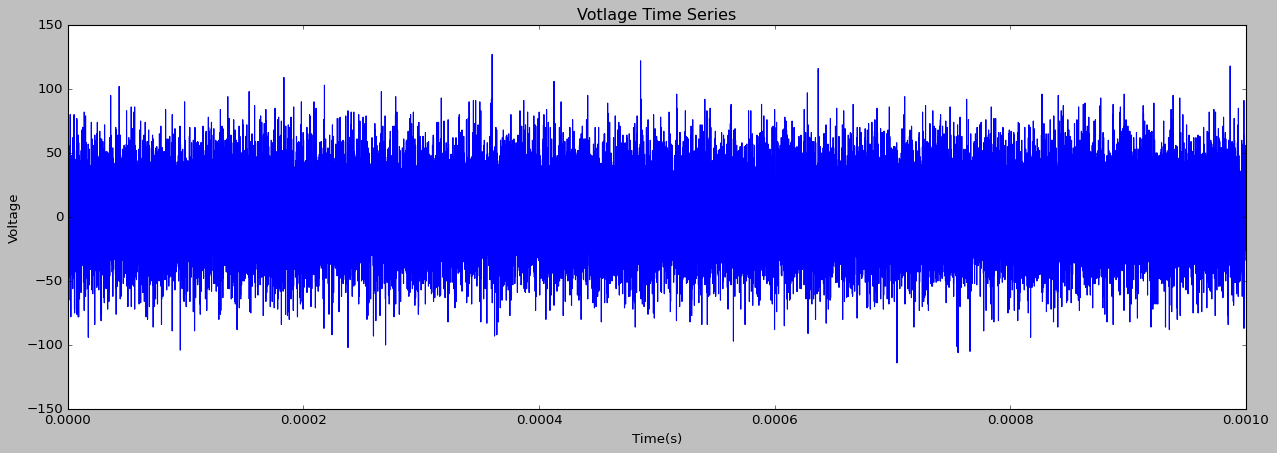

In [5]:
plt.figure(figsize=(19,6))
plt.plot(t1,s11)
plt.xlabel('Time(s)')
plt.ylabel('Voltage')
plt.title('Votlage Time Series')
plt.show()

##B

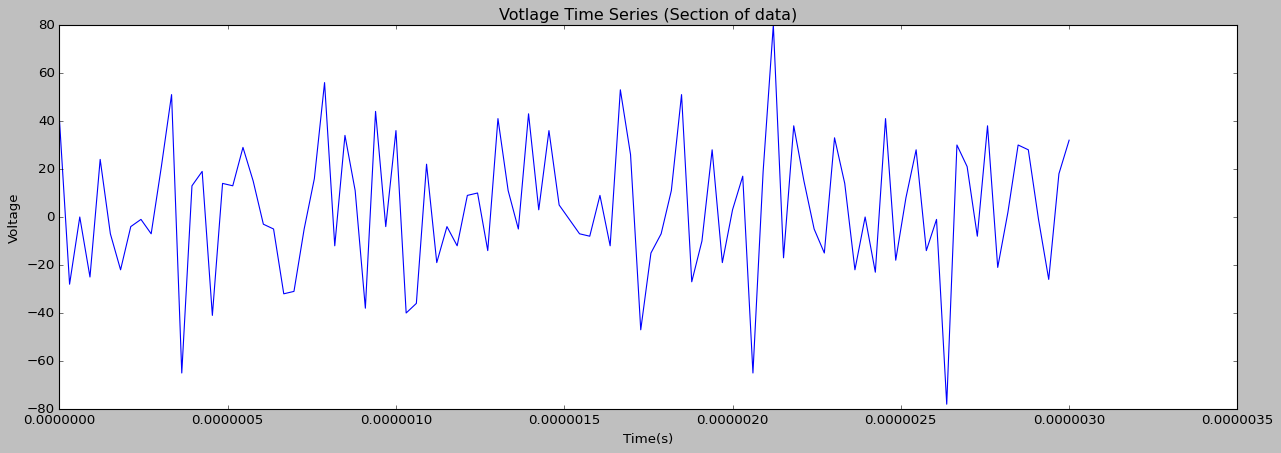

In [6]:
plt.figure(figsize=(19,6))
s21=v11[:100]                 # 100 Data of North Pole
t2=t1[:100]                   # 100 values from time scale
plt.plot(t2,s21)
plt.xlabel('Time(s)')
plt.ylabel('Voltage')
plt.title('Votlage Time Series (Section of data)')
plt.show()

#Task 2 - Voltage Histogram
We have to plot Probability distrubution of V and compare it with gaussian distribution which is given by :
$$f(x)=\frac{e^\frac {-(x-\mu)^2}{2\sigma^2}}{\sigma\sqrt{2\pi}}$$

##Mean & Standard Deviation & Gaussian of Voltage Data

In [7]:
m1=np.mean(s11)                                                                   # Finding Mean of AN Data
sd1=np.std(s11)                                                                   # Finding Standard Deviation of AN Data
m2=np.mean(s12)                                                                   # Finding Mean of AS Data
sd2=np.std(s12)                                                                   # Finding Standard Deviation of AS Data

print('Mean & Standard Deviation of NA Voltage Data is', m1,'&', sd1, 'Resp')
print('Mean & Standard Deviation of SA Voltage Data is', m2,'&', sd2, 'Resp')

def f1(x):                                                                        # defining gaussian function AN Data
  return np.exp(-(x-m1)**2/(2*sd1**2))/(sd1*(2*np.pi)**0.5)

def f2(x):                                                                        # defining gaussian function of AS Data
  return np.exp(-(x-m2)**2/(2*sd2**2))/(sd2*(2*np.pi)**0.5)


Mean & Standard Deviation of NA Voltage Data is 3.4983030303030302 & 28.06346698001649 Resp
Mean & Standard Deviation of SA Voltage Data is 0.7481212121212121 & 30.193432149310297 Resp


##Plotting Voltage Histogram

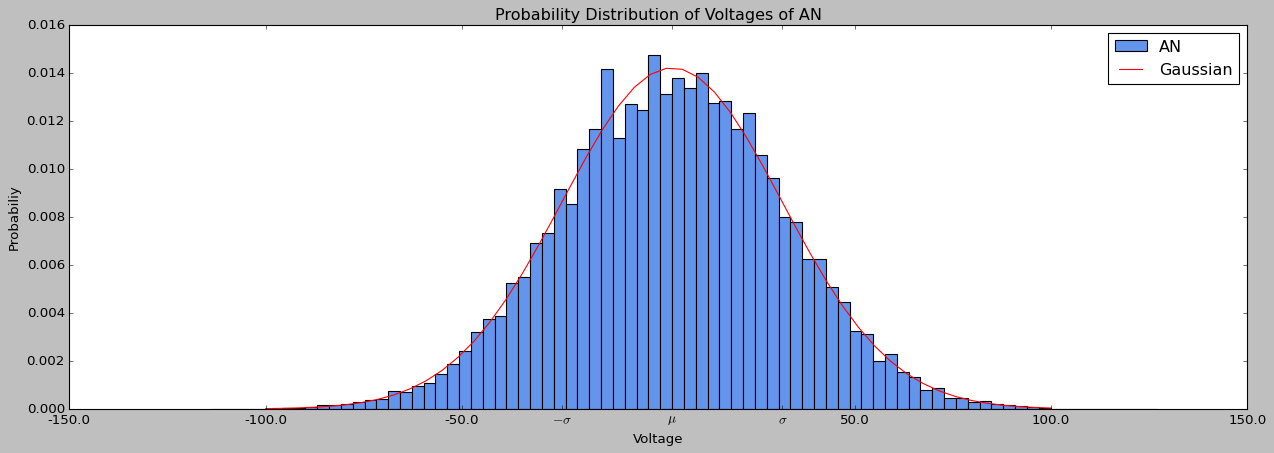

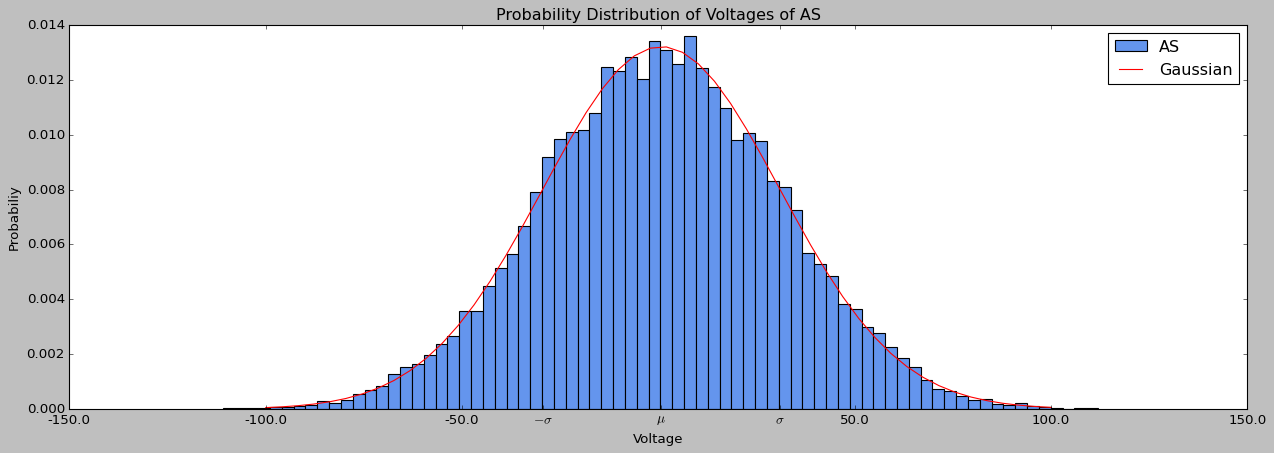

In [8]:
#Plotting Histogram of North Pole Data
plt.figure(figsize=(19,6))
x=np.linspace(-100,100)
plt.hist(s11,bins=80,color='cornflowerblue',density=1,label='AN')                                         # Plotting Histogram
plt.plot(x,f1(x),color='r',label='Gaussian')                                                              # Plotting Gaussian
plt.title('Probability Distribution of Voltages of AN')
plt.xlabel('Voltage')
plt.ylabel('Probabiliy')
plt.legend(loc='upper right')

#Ticks
ticks, tick_labels = plt.xticks()                                                                         # getting ticks from graph
# removing +/-25 and 0 from ticks array to prevent overcrowing
ticks = [i for i in ticks if i not in (25, -25, 0)]
# tick_labels are not populated until the figure is drawn
# so manually preparing tick_labels
tick_labels = np.asarray([str(i) for i in ticks])
xtra_ticks = [m1-sd1, m1, m1+sd1]
xtra_labels = [r'$-\sigma$', r'$\mu$', r'$\sigma$']
plt.xticks(np.concatenate((ticks, xtra_ticks)), labels=np.concatenate((tick_labels, xtra_labels)))

plt.show()



#Plotting Histogram of South Pole Data
plt.figure(figsize=(19,6))
x=np.linspace(-100,100)
plt.hist(s12,bins=74,color='cornflowerblue',density=1,label='AS')                                         # Plotting Histogram
plt.plot(x,f2(x),color='red',label='Gaussian')                                                            # Plotting Gaussian
plt.title('Probability Distribution of Voltages of AS')
plt.xlabel('Voltage')
plt.ylabel('Probabiliy')
plt.legend(loc='upper right')
#ticks
ticks, tick_labels=plt.xticks()
ticks=[i for i in ticks if i not in (-25,0,25)]
tick_lables=[str(i) for i in ticks]
xtra_ticks=[m2-sd2,m2,m2+sd2]
xtra_labels = [r'$-\sigma$', r'$\mu$', r'$\sigma$']
plt.xticks(np.concatenate((ticks,xtra_ticks)),labels=np.concatenate((tick_lables,xtra_labels)))
plt.show()




# Task 3 - Power
We have to plot Probability distrubution of Power and compare it with Exponential Fitting which is given by :
$$f(x)={λ}e^{-{λ}x}$$

Here λ=1/σ


##Mean & Standerd Deviation & Exponential Fit of Power

In [9]:
mp1=np.mean(pwr1)                                                                   # Finding Mean of AN Power
sdp1=np.std(pwr1)                                                                   # Finding Standerd Deviation of AS Power
mp2=np.mean(pwr2)                                                                   # Finding Mean of AS Power
sdp2=np.std(pwr2)                                                                   # Finding Standerd Deviation of AS Power

print('Mean & Standard Deviation of NA Power Data is', mp1,'&', sdp1, 'Resp')
print('Mean & Standard Deviation of SA Power Data is', mp2,'&', sdp2, 'Resp')

def  g1(x):                                                                         # Defining Exponential Fit For AN Power
  return  np.exp(-x/sdp1)/sdp1

def  g2(x):                                                                         # Defining Exponential Fit For AS Power
  return  np.exp(-x/sdp2)/sdp2


Mean & Standard Deviation of NA Power Data is 1599.5926060606062 & 1613.0638008291332 Resp
Mean & Standard Deviation of SA Power Data is 1824.4060606060607 & 1813.4475039380177 Resp


##Power Time Series

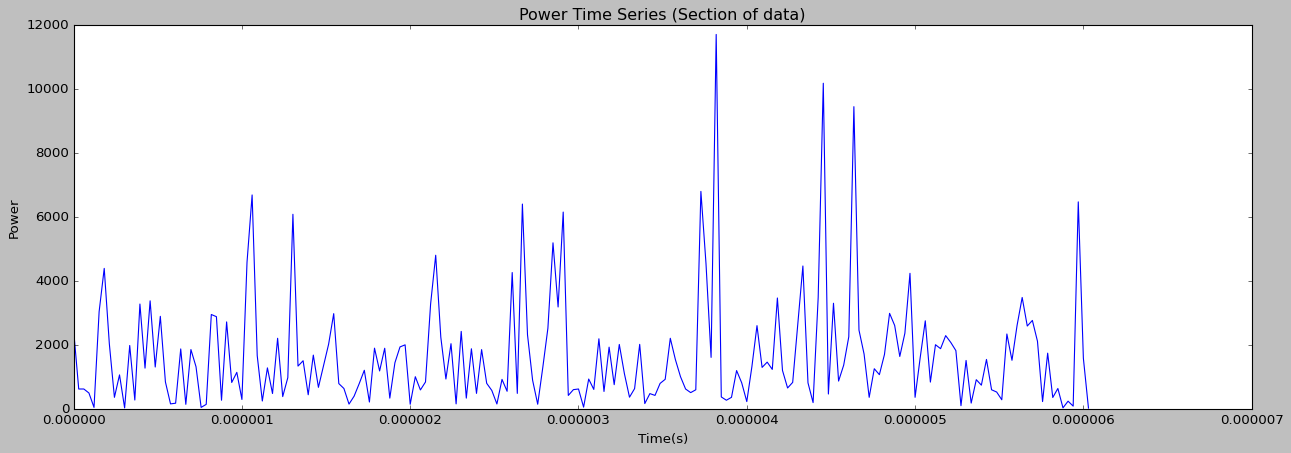

In [10]:
plt.figure(figsize=(19,6))
pwr300=pwr1[:200]                                                                   # taking 200 sample from total power
t3=t1[:200]
plt.plot(t3,pwr300)
plt.xlabel('Time(s)')
plt.ylabel('Power')
plt.title('Power Time Series (Section of data)')
plt.show()

##Power Histogram

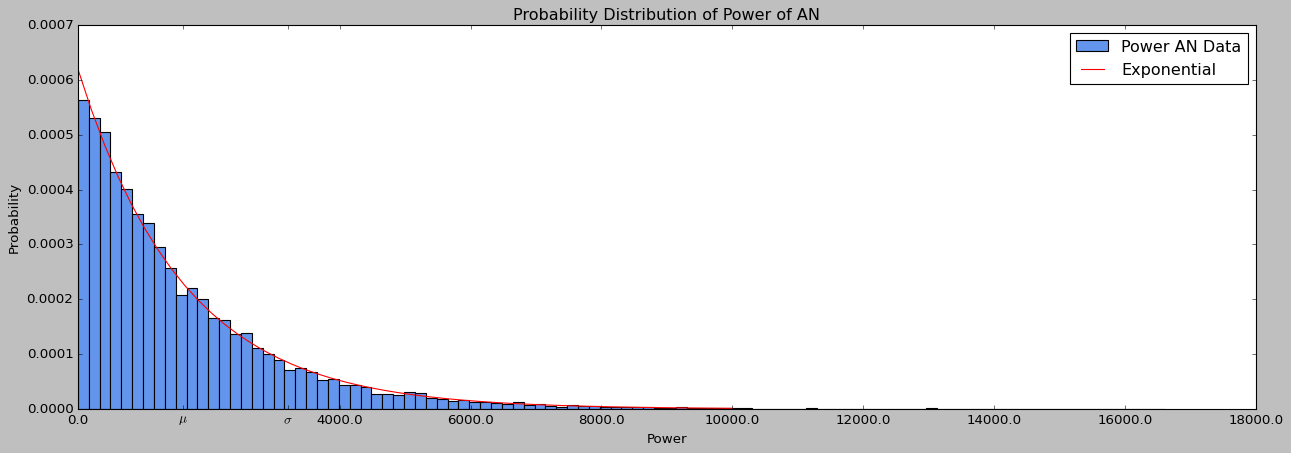

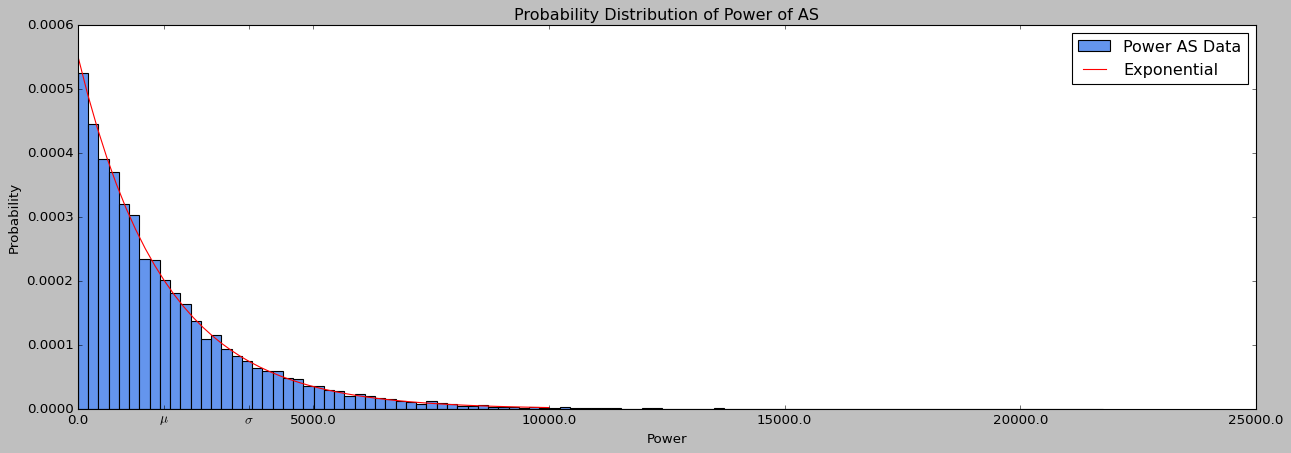

In [11]:
#Power Histogram North antenna
plt.figure(figsize=(19,6))
x=np.linspace(0,10000)
plt.hist(pwr1,bins=100,color='cornflowerblue', density=1,label='Power AN Data')   # Plotting Power Histogram
plt.plot(x,g1(x),color='red',label="Exponential")                                 # Plotting Exponential Fit
plt.legend(loc='upper right')
plt.xlabel('Power')
plt.ylabel('Probability')
plt.title('Probability Distribution of Power of AN')
#ticks
ticks, tick_labels=plt.xticks()
ticks=[i for i in ticks if i not in [2000]]
tick_lables=[str(i) for i in ticks]
xtra_ticks=[mp1,mp1+sdp1]
xtra_labels = [r'$\mu$', r'$\sigma$']
plt.xticks(np.concatenate((ticks,xtra_ticks)),labels=np.concatenate((tick_lables,xtra_labels)))
plt.show()


#Power Histogram South antenna
plt.figure(figsize=(19,6))
x=np.linspace(0,10000)
plt.hist(pwr2,bins=100,color='cornflowerblue', density=1,label='Power AS Data') # Plotting Power Histogram
plt.plot(x,g2(x),color='r',label="Exponential")                                 # Plotting Exponential Fit (Function At Task 2)
plt.legend(loc='upper right')
plt.xlabel('Power')
plt.ylabel('Probability')
plt.title('Probability Distribution of Power of AS')
#ticks
ticks, tick_labels=plt.xticks()
ticks=[i for i in ticks if i not in [2000]]
tick_lables=[str(i) for i in ticks]
xtra_ticks=[mp2,mp2+sdp2]
xtra_labels = [r'$\mu$', r'$\sigma$']
plt.xticks(np.concatenate((ticks,xtra_ticks)),labels=np.concatenate((tick_lables,xtra_labels)))
plt.show()


#Task 4 - Fast Fourier Tranform

##FFT of All Data

In [12]:
#calculating fft of all voltage data (AN)
vff_all=np.fft.fft(v11)
yv=np.abs(vff_all)

#Frequancy
freq_all=np.arange(0,n,1)   # n is number of data


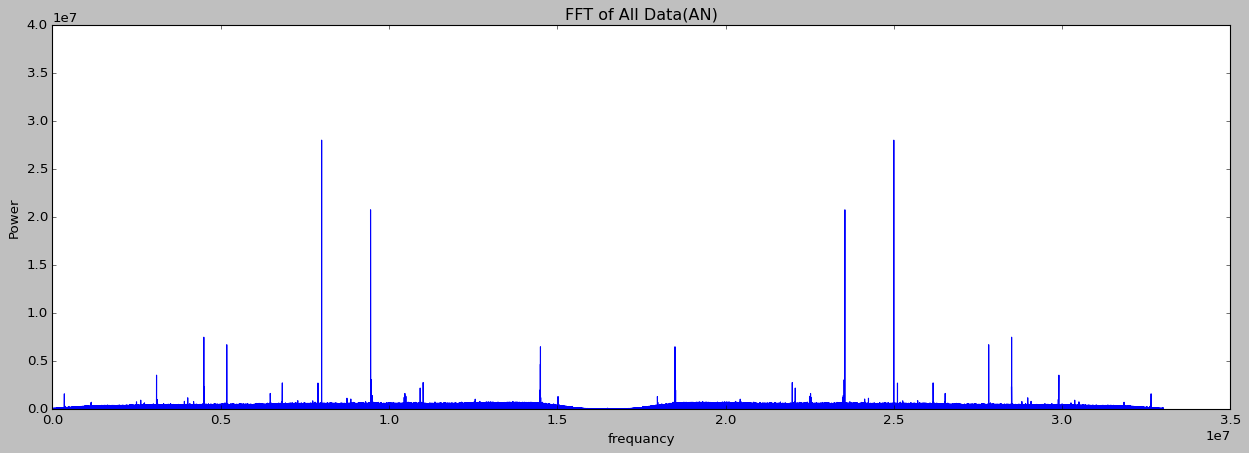

In [13]:
#FFT (Fast Fourier Transform) of All Voltage (AN)
plt.figure(figsize=(19,6))
plt.xlabel('frequancy')
plt.ylabel('Power')
plt.title('FFT of All Data(AN)')
plt.ylim(0,0.4e8)
plt.plot(freq_all,yv)
plt.show()

##Taking NN=256

In [14]:
NN=256                                                    # NxN Matrix of FFT
itr = n//NN                                               # number of iteration
freq=np.linspace(0,33e6,NN)                               # Defining frequancy

pff=np.zeros(NN)                                          # defining FF for NN Voltage
for i in range (itr):
  power = np.abs(np.fft.fft(v11[i*NN : (i+1)*NN]))**2
  pff = pff + power

pff=pff/itr
pff=pff[1:]                                               # to remove fist (0th) element because it give spike at origin

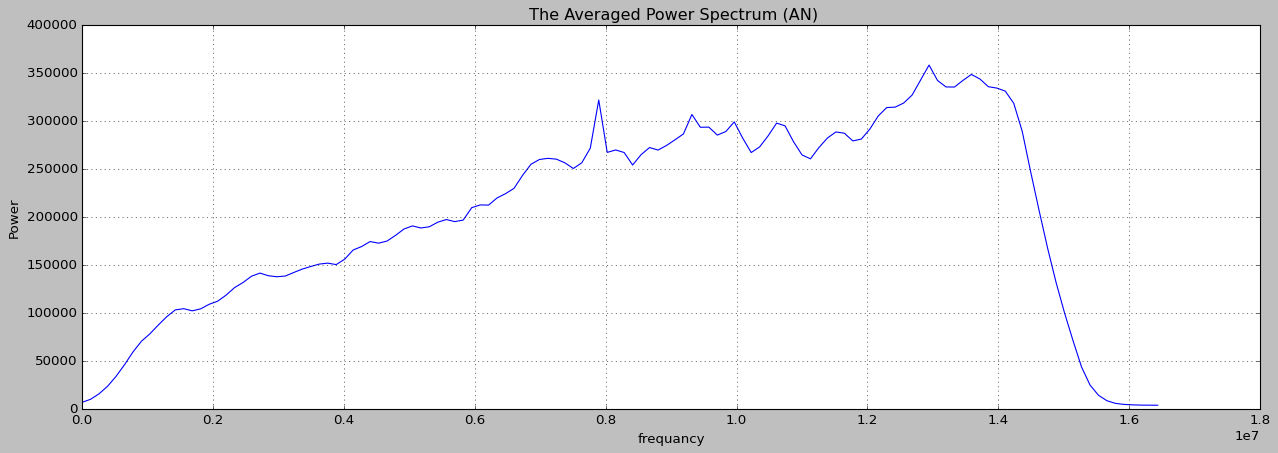

In [15]:
#FFT of All 16500 Power
plt.figure(figsize=(19,6))
plt.plot(freq[:NN//2],pff[:NN//2],label='FFT')
plt.xlabel('frequancy')
plt.ylabel('Power')
plt.title(' The Averaged Power Spectrum (AN)')
plt.grid()
plt.show()

#Task 5 - Spectrograph

In [16]:
num_spectra = 1000                                                                    # number of spectra (1s/1ms)
m=n/num_spectra                                                                       # number of data in 1 ms
itr =int(m/NN)                                                                        # number of iteration
delt_out=(1.0/33.0e6)*float(NN)*float(itr)                                            # time interval used for 1 output spectrum (due to some data discarded)
t_total=delt_out*num_spectra                                                          # total time for total Spectrum
time_spec=np.linspace(0,t_total,num_spectra)                                          # defineng time for x axis


power_arr = []                                                                        # Defining Power Array for NN * 1000 array

for j in range (0,num_spectra):                                                       # to get fft of 1000 1ms in  one array
  pff=np.zeros(NN)
  for i in range(itr):
    power = np.abs(np.fft.fft(v11[i*NN + int(j*m) : (i+1)*NN + int(j*m)]))**2         # taking fft of 1ms data
    pff = pff + power                                                                 # storing 1ms fft array

  pff=pff/itr                                                                         # taking mean of fft stored in 1ms array
  power_arr.append(pff)                                                               # appending each power arr in power_arr array

  # power_arr = list(map(list, zip(*power_arr))) #to flip array means Raw to Collomn
power_arr=np.transpose(power_arr)                                                     # Taking Transpose of Array

corr_freq=freq-8.25e6+326.5e6                                                         # For simplicity data given in range(0,33MHz)
                                                                                      # 33MHz is Bandwidth of telescope to get original bandwidth

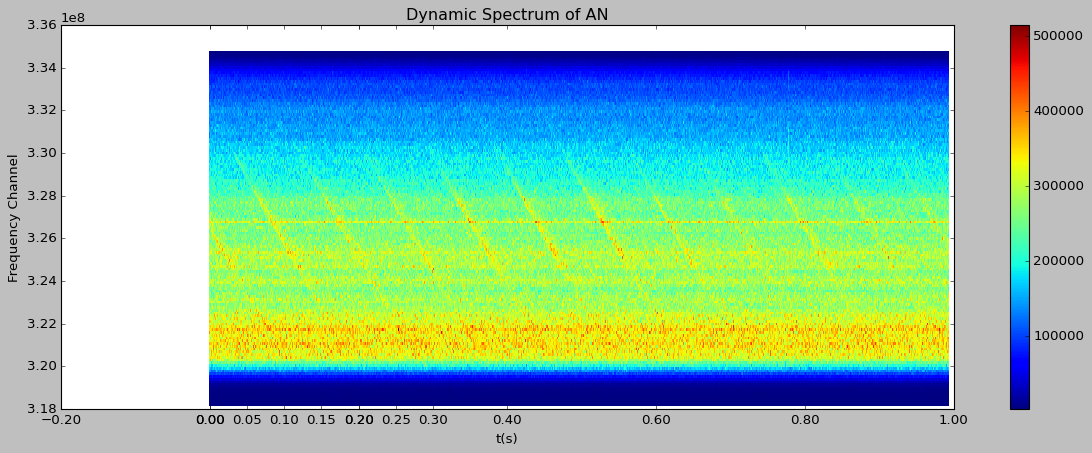

In [17]:
plt.figure(figsize=(18,6))
plt.pcolor(time_spec,corr_freq[:NN//2],power_arr[len(power_arr)//2:])
plt.colorbar()
plt.xlabel('t(s)')
plt.ylabel('Frequency Channel')
plt.title('Dynamic Spectrum of AN')

#ticks  rf frequancy=326.5MHz
ticks, tick_labels=plt.xticks()
xtra_ticks=[0,0.05,0.1,0.15,0.20,0.25,0.30]
plt.xticks(np.concatenate((ticks,xtra_ticks)))

plt.show()

#Task - 6 Phase Shift


---

$$∆t ≈ 4.149 * 10^3 * (DM/pc cm^-3)*(v/MHz)^−2 seconds$$

so,

$$ DM=0.226295 * 10-3 * ∆t * v^2  \,pc\,cm^-3\\
Where, 1/v^2=(1/v2^2)-(1/v1^2)\\
v=frequency=f(here)
\\DM= Dispersion \,Measure$$

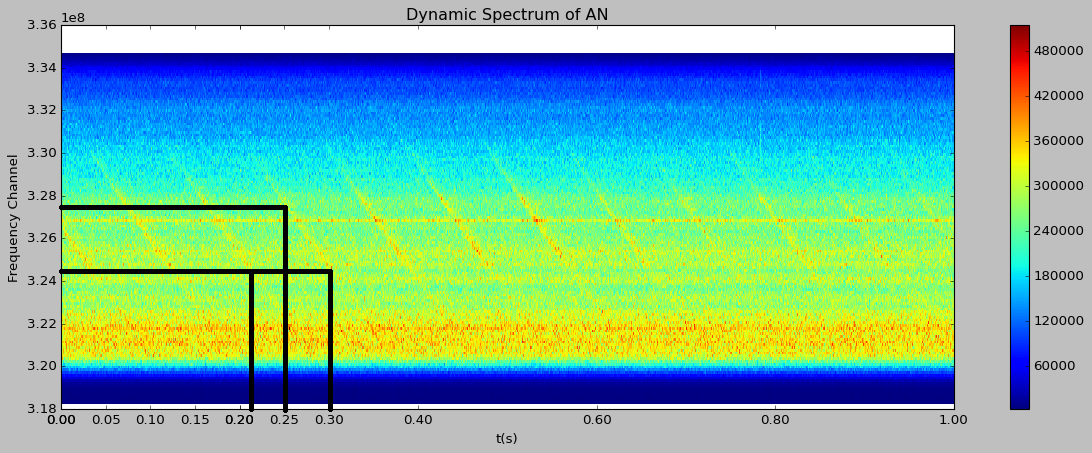

now, From Graph


---
$$∆t=0.05 s\\
f1=327.4MHz
\\f2=324.6MHz
\\Period\, P=0.089 s $$

In [18]:
dt=0.05
fd1=327.4
fd2=324.6
period=0.089

fsqr=1/((1/fd2**2)-(1/fd1**2))
DM=(0.226295*10**-3)*dt*(fsqr)    # calculating Dispersion Measure

print(DM,"s")

69.99930316678993 s


#Task - 7

##De-dispersion

In [19]:
cent_freq=326.5                                                 # frequency is in MHz
sel_freq=corr_freq*1e-6                                         # to take selected frequancy in MHz

de_dis=np.zeros((NN//2,num_spectra))                            # taking 2d array to store de-dispersed values

for i in range (NN//2):
  delt=4.149*1e6*DM*((1/sel_freq[i]**2)-(1/cent_freq**2))       # calculating delay
  de_dis[i]=shift(power_arr[i],delt)                            # shifting each value by delta t



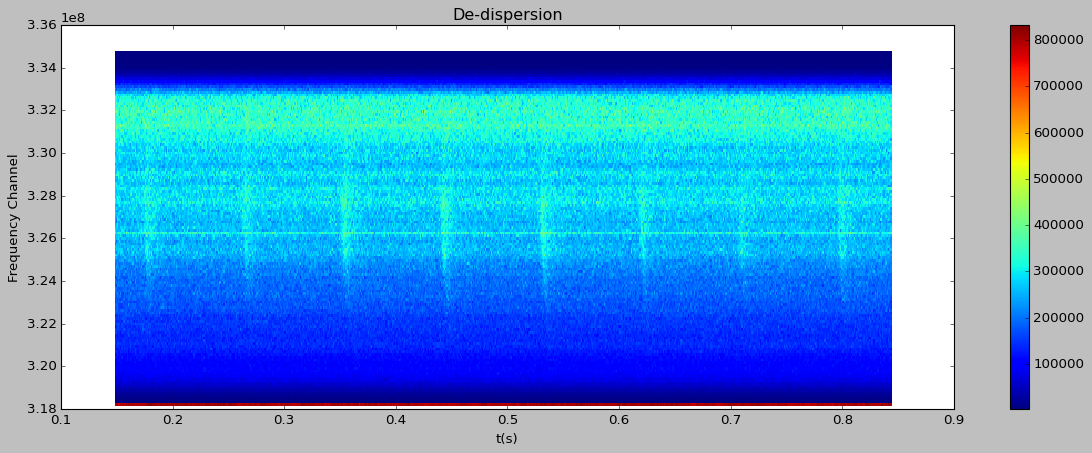

In [20]:
plt.figure(figsize=(18,6))
plt.pcolor(time_spec[150:850],corr_freq[:NN//2],de_dis[:NN//2,150:850])   # to crop sides
plt.colorbar()
plt.xlabel('t(s)')
plt.ylabel('Frequency Channel')
plt.title('De-dispersion')
plt.show()

##Folding

In [21]:
pulse=np.zeros(700)
k=0
for i in range(150,850):
  for j in range(0,NN//2):
    pulse[k]+=de_dis[j,i]             # Adding all rows in 1st row "It can be called as Colapsing of de-dispersed dynamic spectrum to frequancy axis"
  k+=1

# Above process is equivalent to
# pulses = de_dis.sum(0)[150:850]
# It can also be done in short using this command

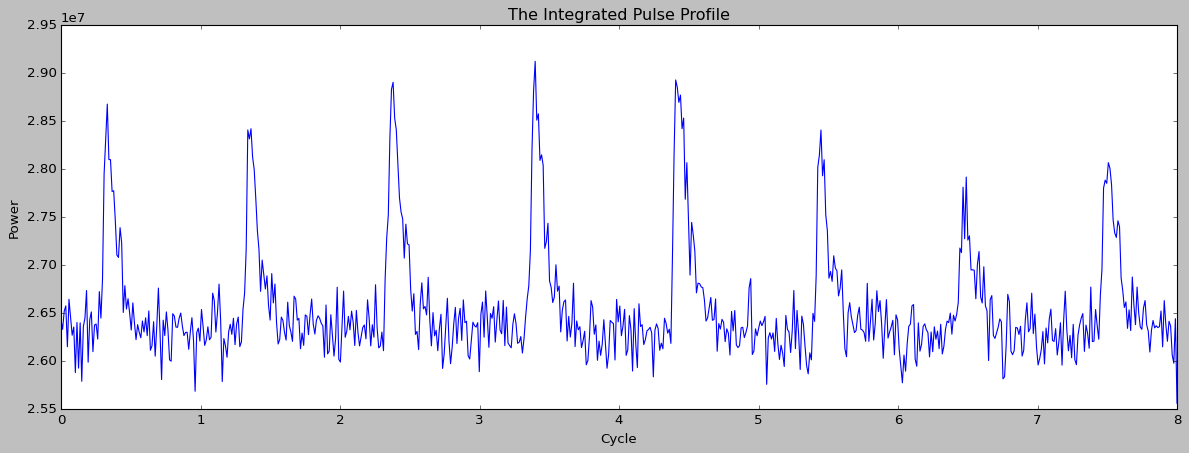

In [22]:
x=np.linspace(0,8,700)               # array to show cycle number
plt.figure(figsize=(18,6))
plt.plot(x,pulse)
plt.xlabel('Cycle')
plt.ylabel('Power')
plt.title('The Integrated Pulse Profile')
plt.show()

##Single Pulse

In [23]:
nbin=100                                    # Number of bins to take single pulse
sin_pul=np.zeros(nbin)
n_avg=np.zeros(nbin)

for i in range (0,700):
  t_now=i*delt_out                          # Here we are making 100 bins
  a_pulse=t_now/period                      # where we estimate to which bin the data belong
  f_pulse=a_pulse-int(a_pulse)
  bin_now=int(f_pulse*float(nbin)+0.5)
  if(bin_now>=nbin): bin_now-=nbin

  sin_pul[bin_now]+=pulse[i]                # Adding concecutive pulse in 1 pulse
  n_avg[bin_now]+=1                         # To take average of data added in bin

sin_pul=sin_pul/n_avg                       # taking average of each value
time_per=np.linspace(0,period,nbin)         # taking period as time bin for single pulse

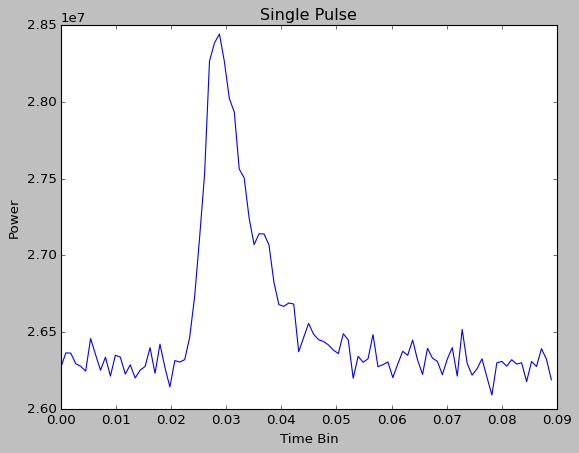

In [24]:
plt.plot(time_per,sin_pul)
plt.xlabel('Time Bin')
plt.ylabel('Power')
plt.title('Single Pulse')
plt.show()